In [1]:
# imports
import sys
sys.path.append("C:\ZSOMBI\OneDrive\PoPy")
sys.path.append("/Users/zsombi/OneDrive/PoPy")

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

from helpers import *

In [2]:
savedir = '/Users/zsombi/Library/CloudStorage/OneDrive-Personal/PoPy/notebooks/decoders/target_and_value/results'


# fname = f'{savedir}/{target}.nc', read them
results = {
    'target_1': None,
    'target_2': None,
    'target_3': None,
}

# close the files
for key in results.keys():
    results[key] = xr.open_dataset(f'{savedir}/{key}_run02.nc')
    results[key].close()

In [3]:
xxx = results['target_1']
xxx

<xarray.Dataset>
Dimensions:        (unit_id: 1137, time: 75)
Coordinates:
  * unit_id        (unit_id) object 'LPFC_05_01' 'LPFC_06_01' ... 'MCC_14_01'
  * time           (time) float64 0.0 0.1014 0.2027 0.3041 ... 7.297 7.399 7.5
    monkey         (unit_id) object ...
    area           (unit_id) object ...
    session        (unit_id) object ...
Data variables:
    results        (unit_id, time) float64 ...
    significances  (unit_id, time) float64 ...

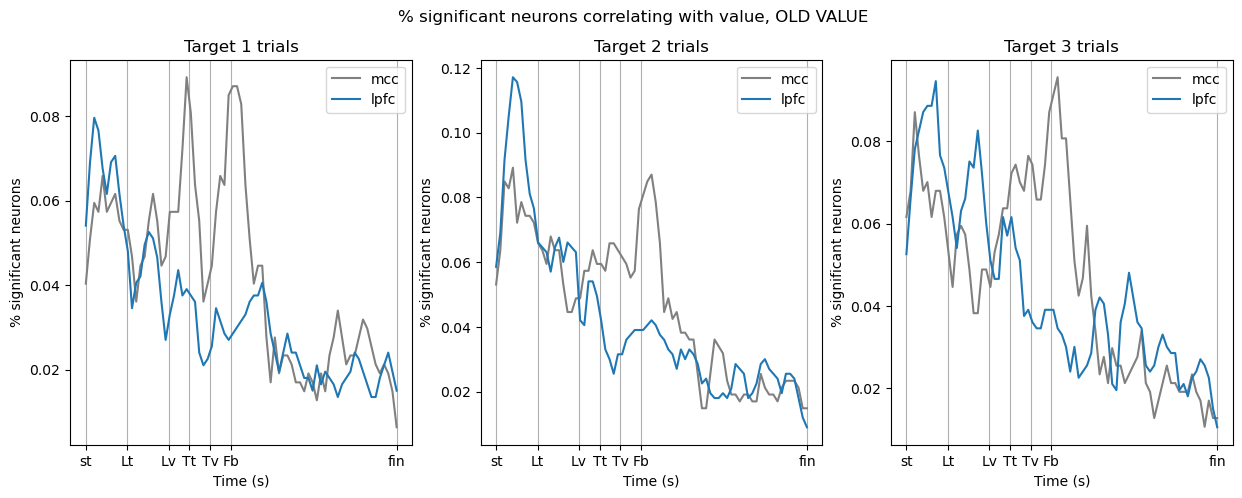

In [23]:
# plot results per target
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
plt.suptitle('% significant neurons correlating with value, OLD VALUE')

for i_target, target in enumerate([1, 2, 3]):
    ax = axs[i_target]
    res_curr = results[f'target_{target}'].results
    pvals_curr = results[f'target_{target}'].significances

    data_masked = np.ma.masked_where(pvals_curr>0.05, res_curr)
    data_masked = mask_N_consecutives(data_masked, 3)

    # plot mean
    mcc_ids = res_curr.area.data == 'MCC'
    lpfc_ids = res_curr.area.data == 'LPFC'

    time_vector = res_curr.time.data

    ax.plot(res_curr.time.data, (data_masked.mask==False)[mcc_ids].mean(0), color='grey', label='mcc')
    ax.plot(res_curr.time.data, (data_masked.mask==False)[lpfc_ids].mean(0), color='tab:blue', label='lpfc')

    plot_keypoints(ax, 1)
    ax.grid(axis='x')
    
    ax.legend()

    ax.set_title(f'Target {target} trials')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('% significant neurons')

    

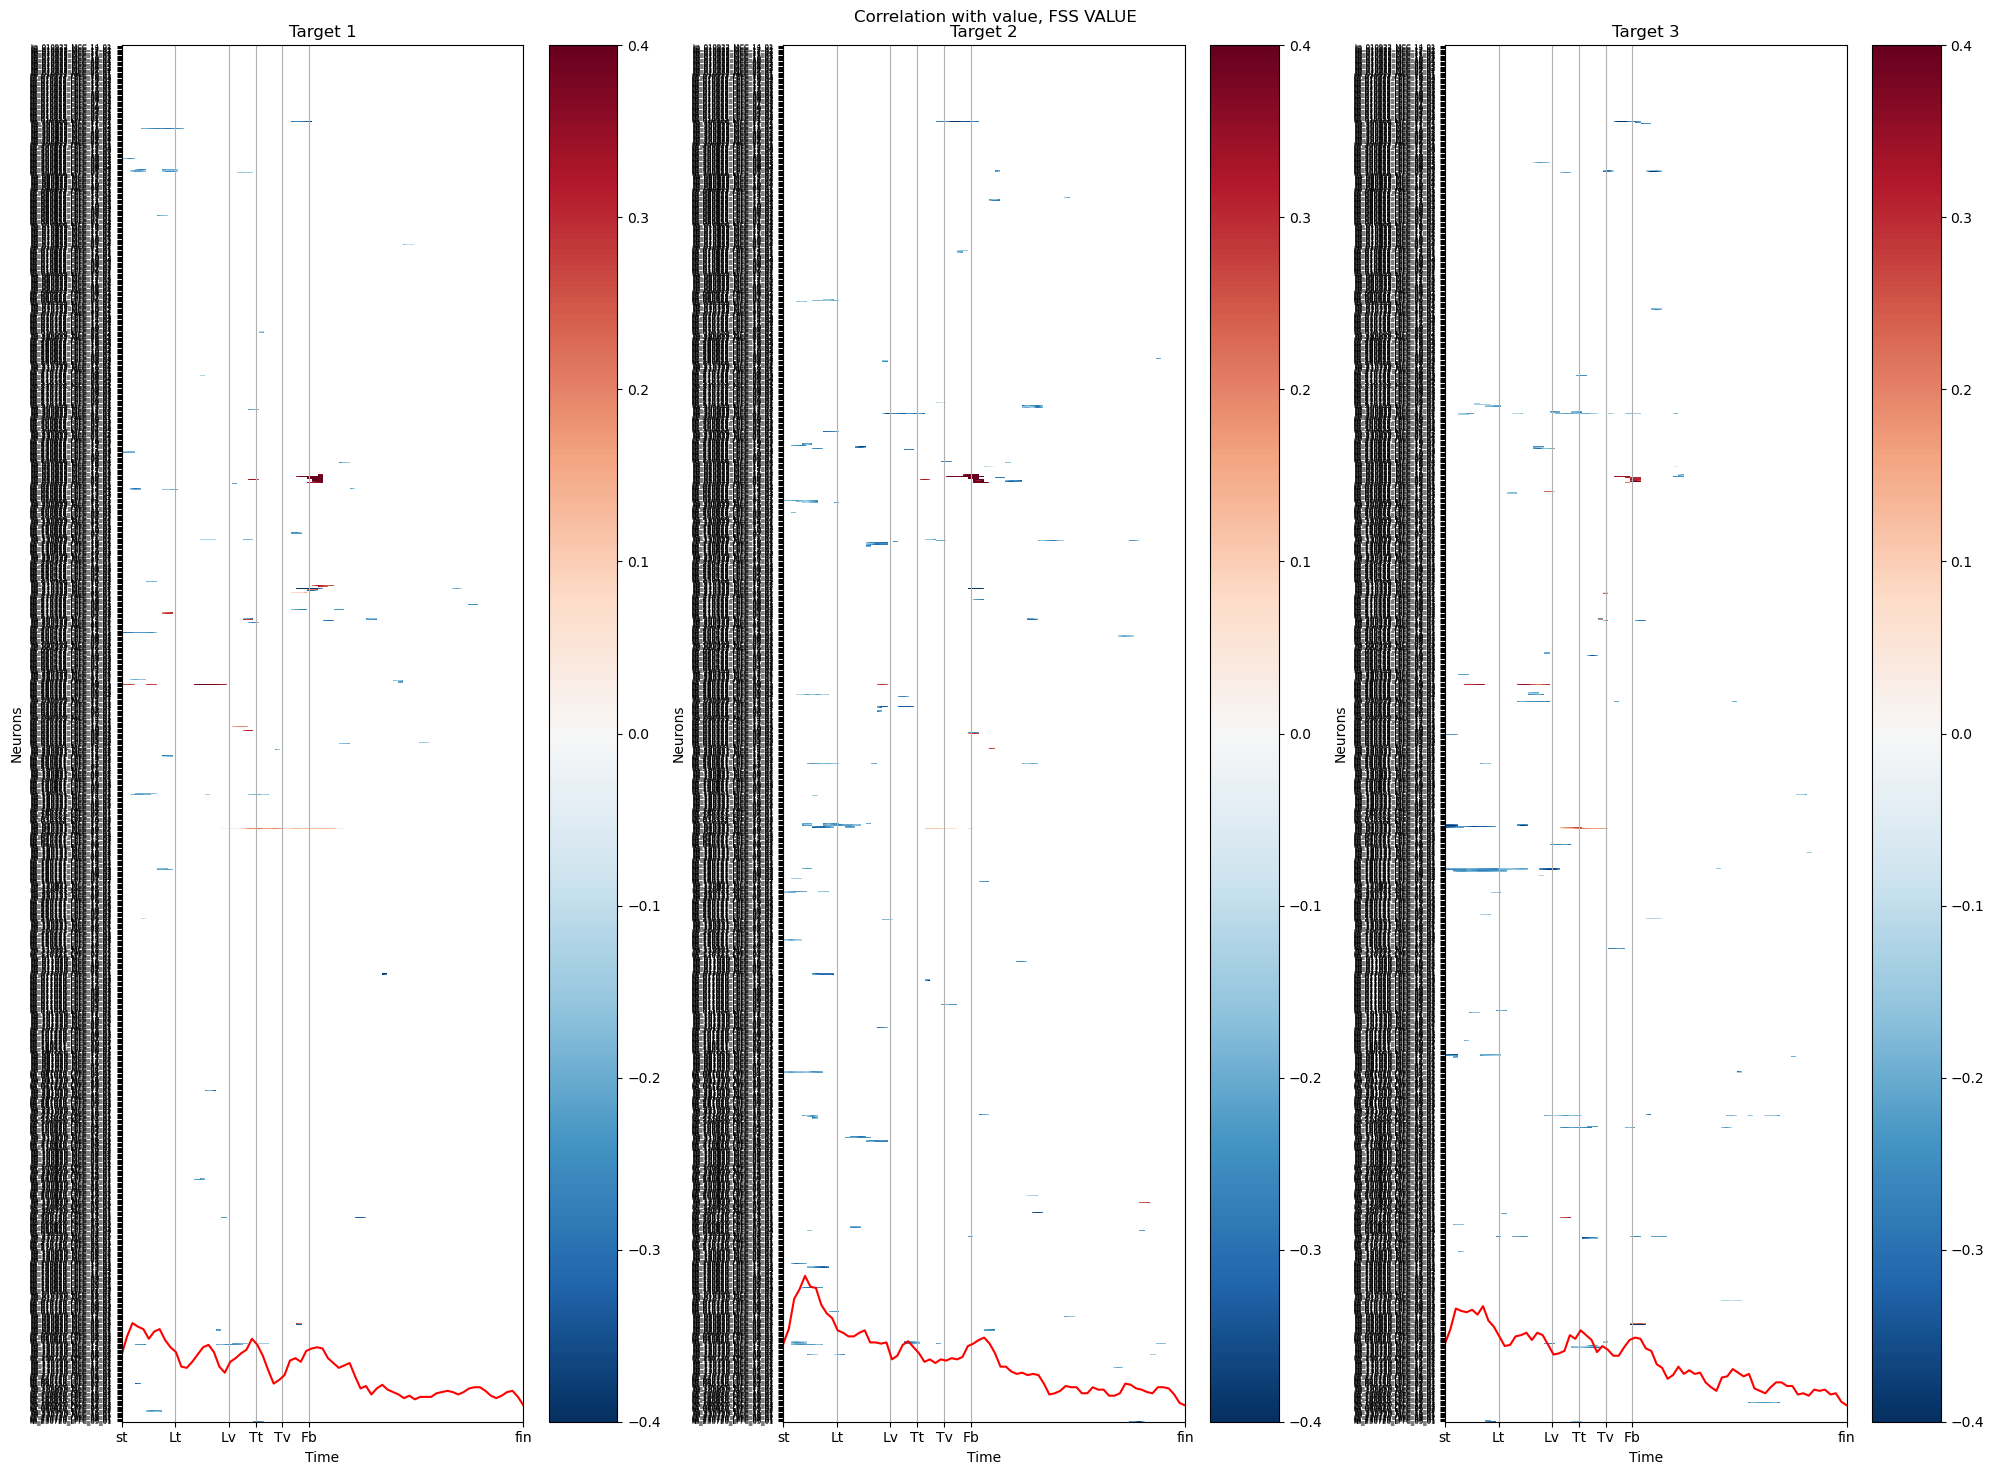

In [7]:
# plot results per target
fig, axs = plt.subplots(1, 3, figsize=(20, 15))

fig.suptitle('Correlation with value, FSS VALUE')

for i_target, target in enumerate([1, 2, 3]):
    ax = axs[i_target]
    res_curr = results[f'target_{target}'].results
    pvals_curr = results[f'target_{target}'].significances

    #data_masked = res_curr
    data_masked = np.ma.masked_where(pvals_curr>0.05, res_curr)
    data_masked = mask_N_consecutives(data_masked, 3)
        
    bar = ax.imshow(data_masked, aspect='auto', origin='lower', extent=[res_curr.time.data[0], res_curr.time.data[-1], -.5, len(res_curr.unit_id.data)-.5], cmap='RdBu_r', vmin=-.4, vmax=.4)
    cbar = plt.colorbar(bar, ax=ax)
    # plot mean
    ax.plot(res_curr.time.data, (data_masked.mask==False).sum(0), color='red')

    ax.set_title(f'Target {target}')

    yticklabels = [f'{monkey}_{session}_{unit}' for monkey, session, unit in zip(res_curr.monkey.data, res_curr.session.data, res_curr.unit_id.data)]
    ax.set_yticks(np.arange(len(yticklabels)))
    ax.set_yticklabels(yticklabels, fontsize=5)
    
    ax.set_xlabel('Time')
    ax.set_ylabel('Neurons')

    plot_keypoints(ax, 1)
    ax.grid(axis='x')

    #ax.set_ylim(500, 1000)
    
plt.tight_layout()
plt.show()